In [2]:
%load_ext autoreload
%autoreload 2

In [78]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

mpl.rcParams['figure.dpi'] = 300
mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['font.size'] = 14
mpl.rcParams['axes.labelsize'] = 'large'
mpl.rcParams['xtick.labelsize'] = 'large'
mpl.rcParams['ytick.labelsize'] = 'large'
mpl.rcParams['axes.titlesize'] = 'x-large'
mpl.rcParams['axes.grid'] = True
mpl.rcParams['grid.alpha'] = 0.53
mpl.rcParams['grid.linestyle'] = '--'
mpl.rcParams['grid.linewidth'] = 0.5
mpl.rcParams['grid.color'] = 'k'
mpl.rcParams['legend.fontsize'] = 'large'
mpl.rcParams['legend.fontsize'] = 'medium'


In [ ]:
from scipy import signal
def compute_PSD(data,dt):
    f, psd = signal.welch(data, fs=1/dt, nperseg=1024)
    return f, psd

In [88]:
from PBSHM_mdof.data.data_handler import HDF5Handler
import h5py
from itertools import product

with h5py.File('../data/raw/datatest.hdf5','r') as f:
    datahandler = HDF5Handler(f)
    populations_name = ['POPULATION_1_healthy_0']
    populations_name=populations_name+[f'POPULATION_1_anomalous_{i}' for i in [0.01,0.03,0.05,0.07,0.09,0.11,0.13]]
    simulations_name = [f'simulation_{i*2+30}' for i in range(20)]
    level_anomaly=[]
    signals=[]
    for population_id,simu_id in product(populations_name,simulations_name):
        data = datahandler.get_data(population=population_id, system='system_0', simulation=simu_id)
        sig = data[0][0]['output'][:,2*8+1]
        signals.append(sig)
        level_anomaly.append(data[0][0]['anomaly_level'])
    


In [89]:

signals_np=np.stack(signals)

/tmp/ipykernel_208302/1676966354.py:21: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='Anomaly severity')


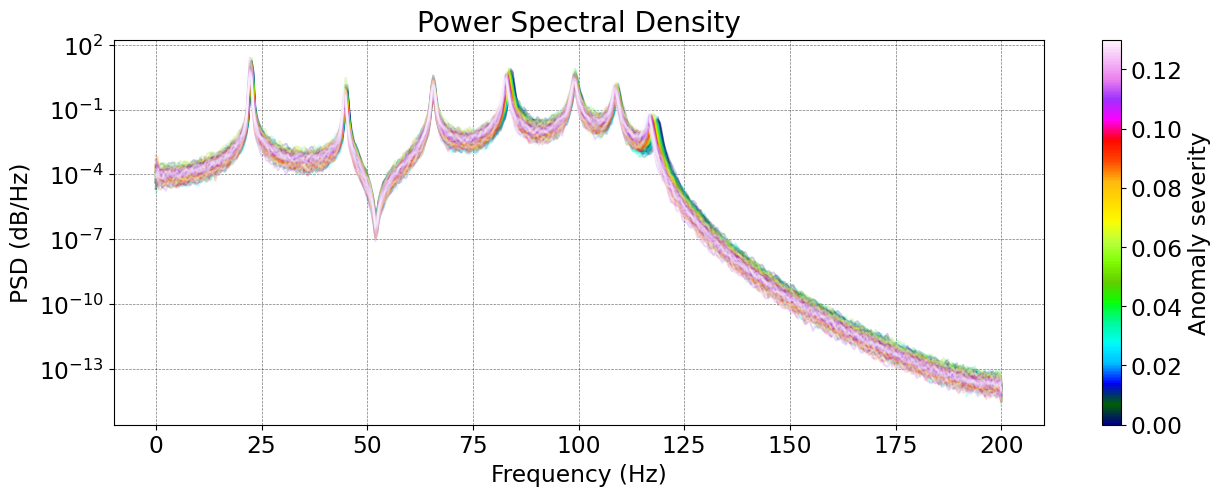

In [90]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

f, psds = compute_PSD(signals_np, dt=0.0025)

# Create a ScalarMappable object
norm = Normalize(vmin=0, vmax=0.13)
sm = plt.cm.ScalarMappable(norm=norm, cmap='gist_ncar')
sm.set_array([])

# Plot the lines and associate them with the ScalarMappable
plt.figure(figsize=(15, 5))
for i in range(len(signals_np)):
    plt.semilogy(f, psds[i], alpha=0.2, c=sm.to_rgba(level_anomaly[i]))

# Add the colorbar
plt.xlabel('Frequency (Hz)')
plt.ylabel('PSD (/Hz)')
plt.title('Power Spectral Density')
plt.colorbar(sm, label='Anomaly severity')
plt.show()



In [92]:
from PBSHM_mdof.data.data_handler import HDF5Handler
import h5py
from itertools import product

with h5py.File('../data/raw/datatest.hdf5','r') as f:
    datahandler = HDF5Handler(f)
    populations_name = ['POPULATION_1_healthy_0']
    simulations_name = [f'simulation_{i}' for i in range(1200)]
    level_anomaly=[]
    signals=[]
    for population_id,simu_id in product(populations_name,simulations_name):
        data = datahandler.get_data(population=population_id, system='system_0', simulation=simu_id)
        sig = data[0][0]['output'][:,2*8+1]
        signals.append(sig)
        level_anomaly.append(data[0][0]['anomaly_level'])
    

In [94]:
signals_np=np.stack(signals)

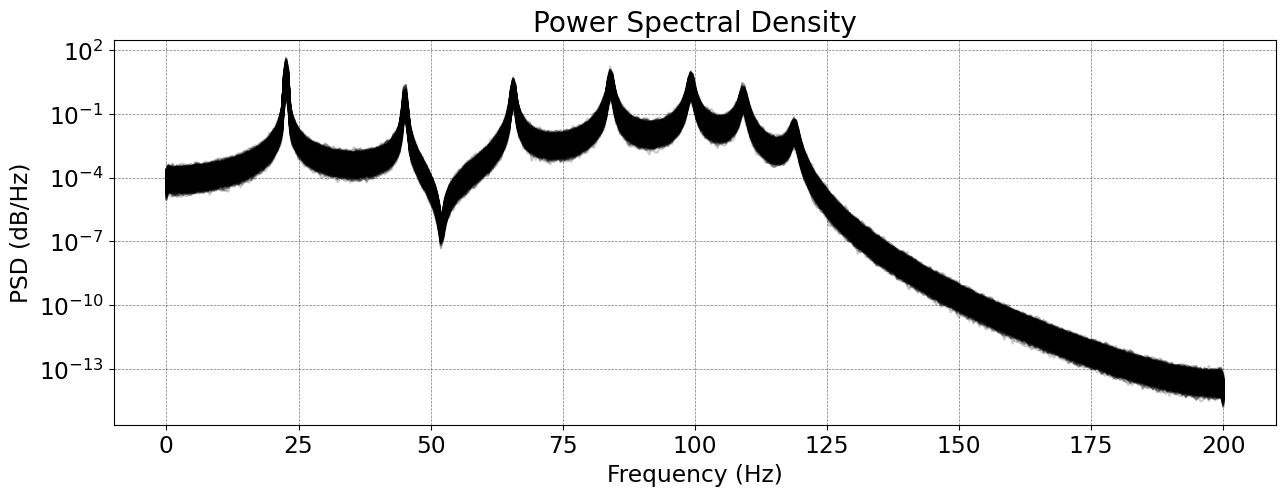

In [95]:
f, psds = compute_PSD(signals_np, dt=0.0025)



# Plot the lines and associate them with the ScalarMappable
plt.figure(figsize=(15, 5))
plt.semilogy(f, psds.T, alpha=0.2, c='k')

# Add the colorbar
plt.xlabel('Frequency (Hz)')
plt.ylabel('PSD (dB/Hz)')
plt.title('Power Spectral Density')
plt.show()

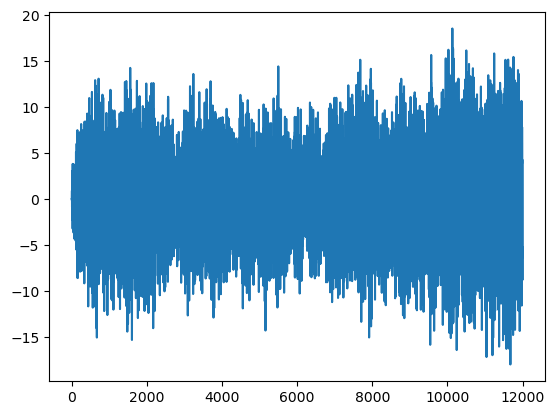

In [59]:
import matplotlib.pyplot as plt
plt.plot(data[0][0]['output'][:,8*2+1])


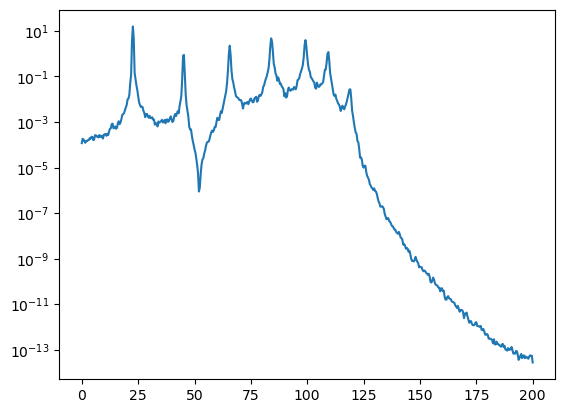

In [63]:
sig = data[0][0]['output'][:,8*2+1]
dt = 0.0025


In [178]:
import numpy as np

# Sampling rate
fs = 200

# Time vector
t = np.linspace(0, 60, fs)

# Signal frequency
f0 = 12

# Noise color
alpha = 0.05

# Generate signal
x = 0.5*np.random.normal(0, 10, len(t)) + 3*np.exp(-alpha * 2 * np.pi * f0 * t) * np.cos(2 * np.pi * f0 * t+np.pi/2)

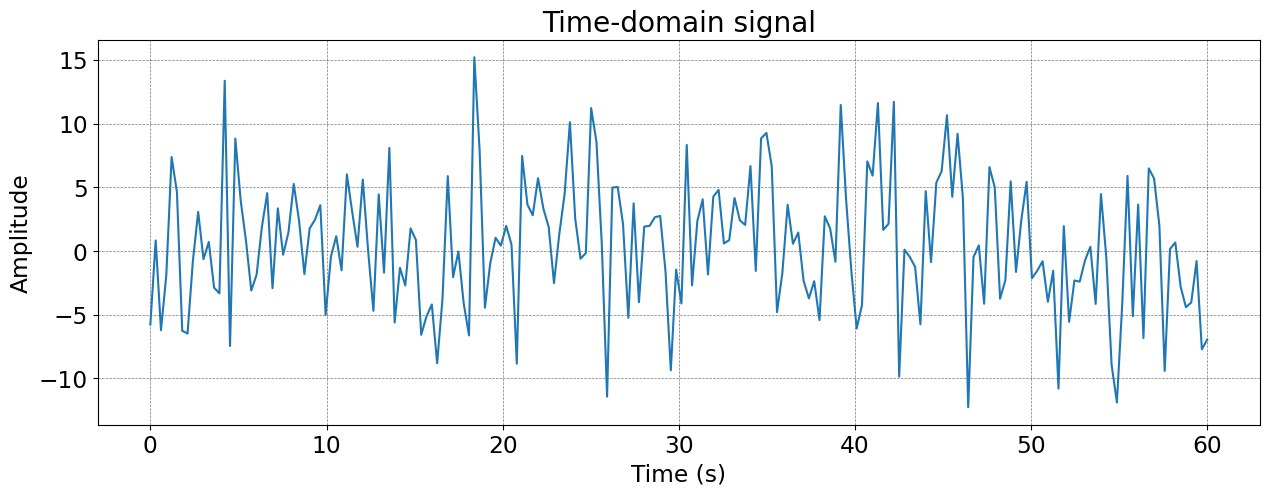

In [179]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
plt.plot(t, x)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Time-domain signal')
plt.show()

In [180]:
from scipy import signal
def compute_PSD(data,dt):
    f, psd = signal.welch(data, fs=1/dt, nperseg=1024)
    return f, psd

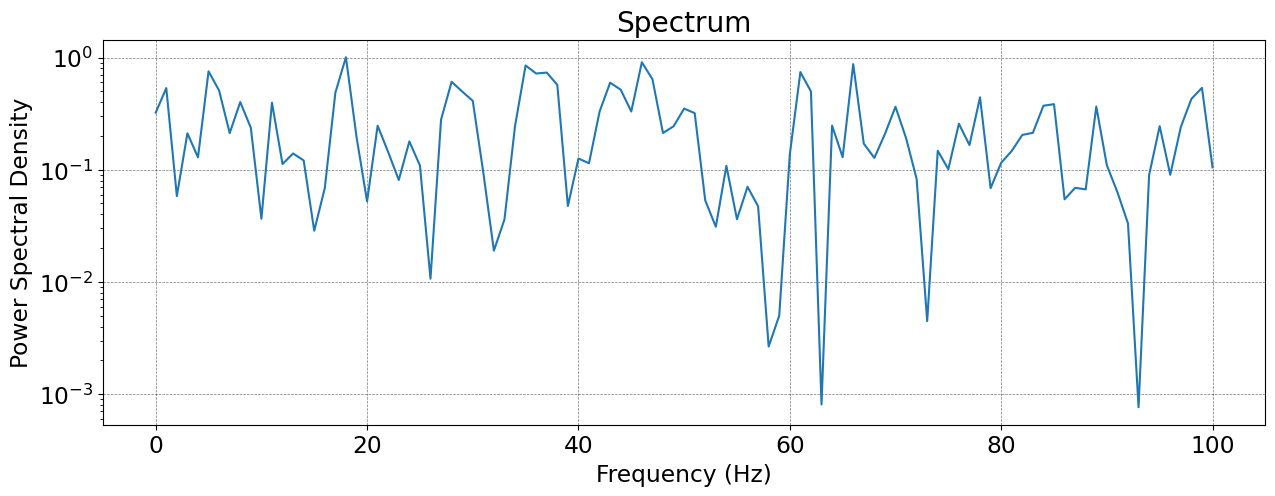

In [181]:
f, Pxx = compute_PSD(x, dt=1/fs)
plt.figure(figsize=(15,5))
plt.semilogy(f, Pxx)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density')
plt.title('Spectrum')
plt.show()